In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [67]:
df = pd.read_csv("D:/NCKH/AMAZON/amazon_delivery.csv")

In [69]:
df.head(15)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


In [71]:
df.shape

(43739, 16)

In [73]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [75]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [79]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [81]:
df["Category"].value_counts()

Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: count, dtype: int64

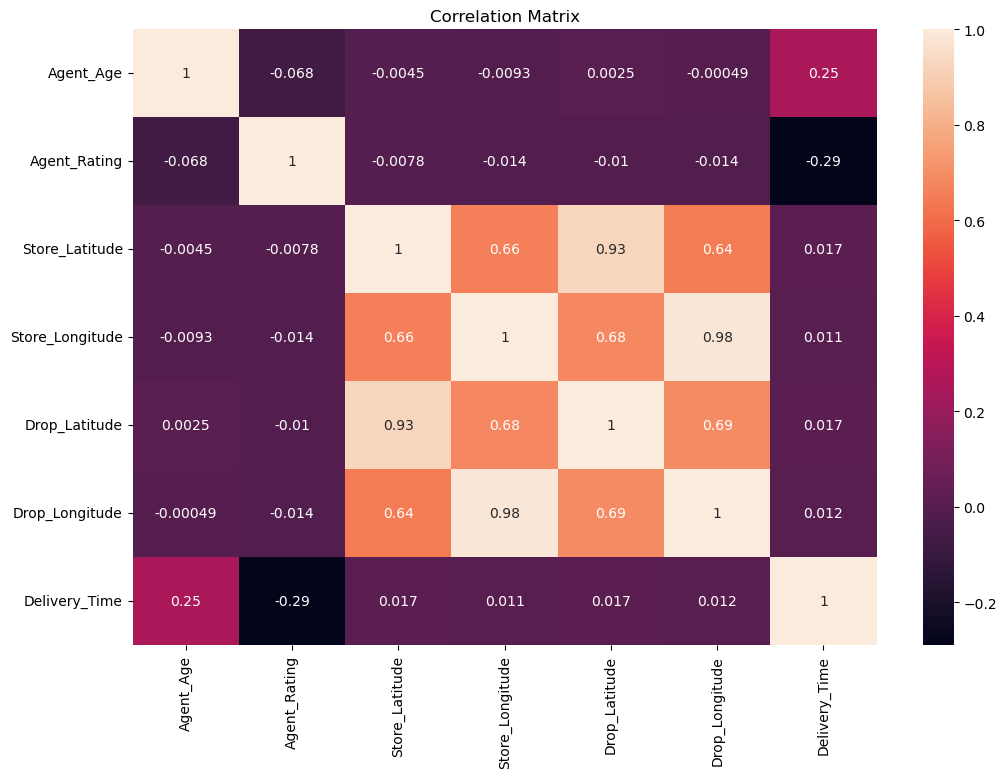

In [83]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [85]:
cats = ["Weather", "Traffic", "Vehicle", "Area", "Category"]

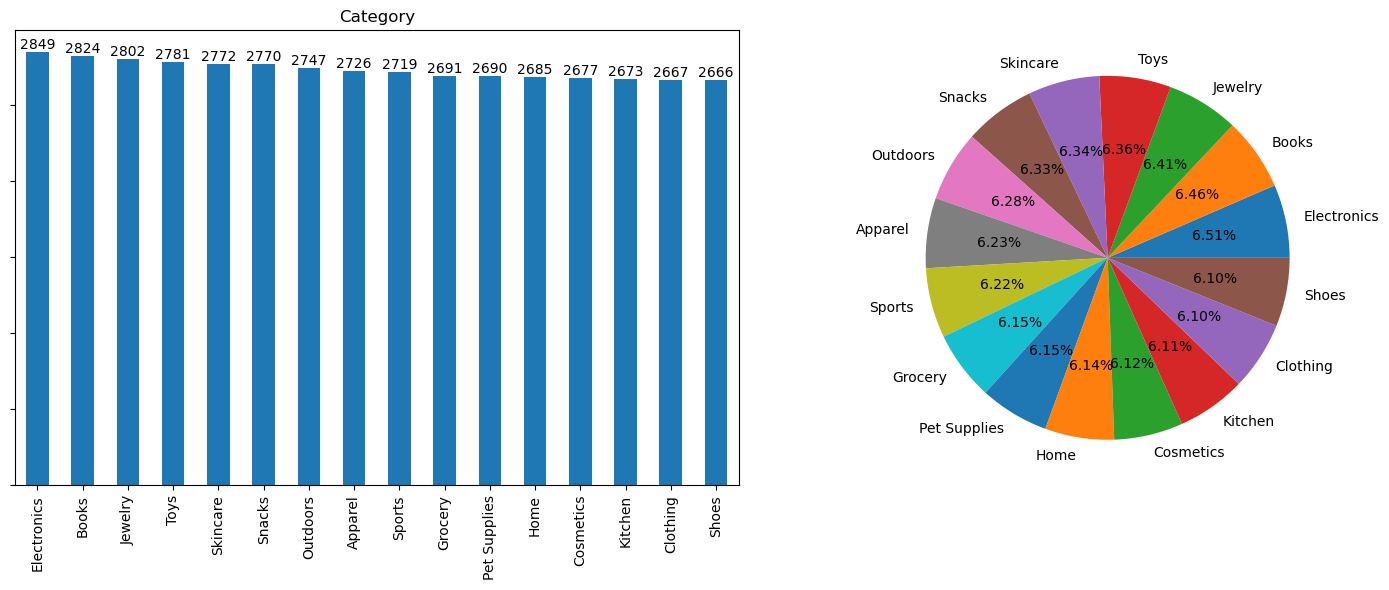

In [87]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

count = df[cats[-1]].value_counts()

count.plot(kind="bar", ax=axes[index])

for container in axes[index].containers:
    axes[index].bar_label(container)
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")
axes[index].set_title(cats[-1])

index += 1


count.plot(kind="pie", ax=axes[index], autopct="%0.2f%%")
axes[index].set_ylabel("")
axes[index].set_xlabel("")

plt.tight_layout()
plt.show()

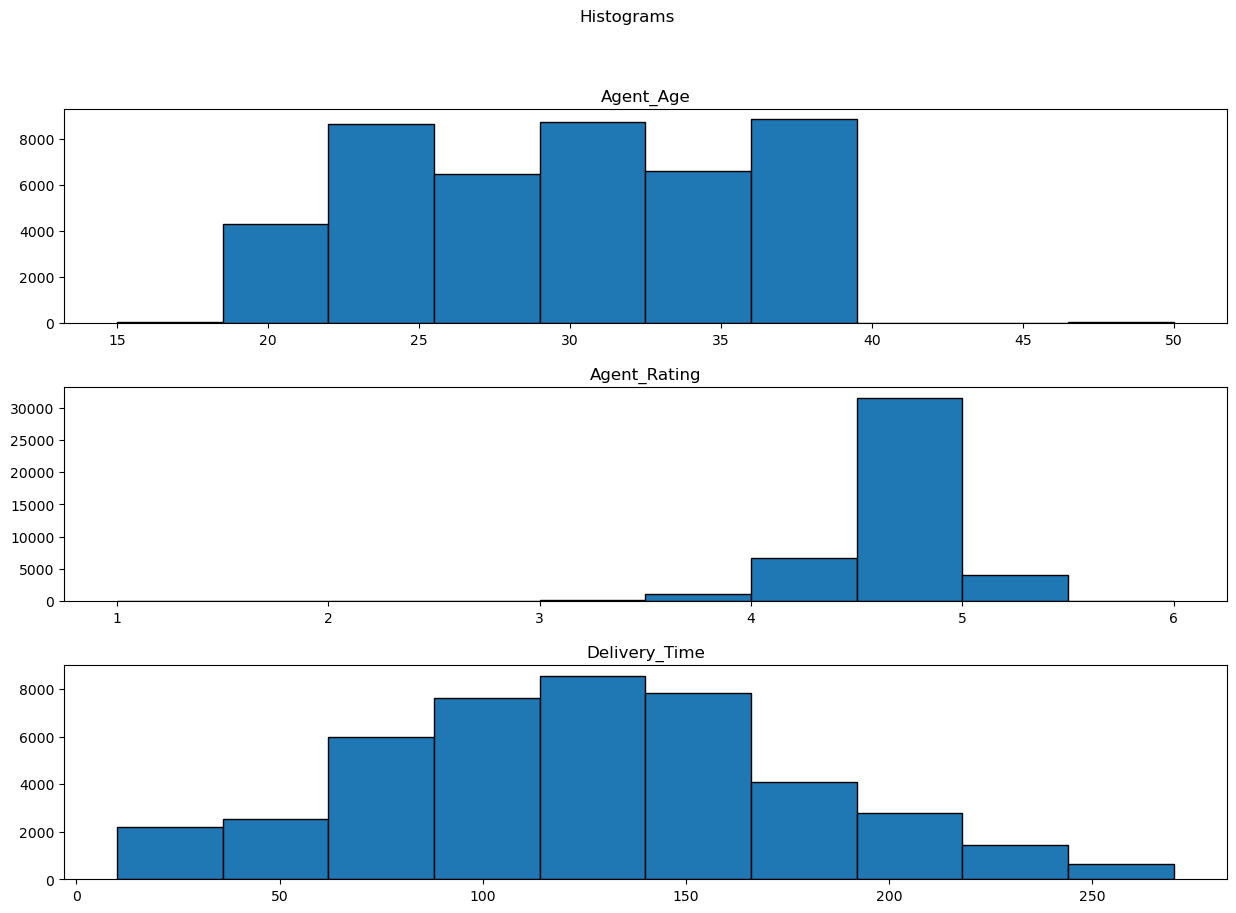

In [89]:
df.hist(column=['Agent_Age','Agent_Rating','Delivery_Time'],figsize=(15,10),layout=(3,1),grid=False,edgecolor='black')
plt.suptitle('Histograms')
plt.show()

In [91]:
df['Vehicle'].value_counts()

Vehicle
motorcycle     25527
scooter        14639
van             3558
bicycle           15
Name: count, dtype: int64

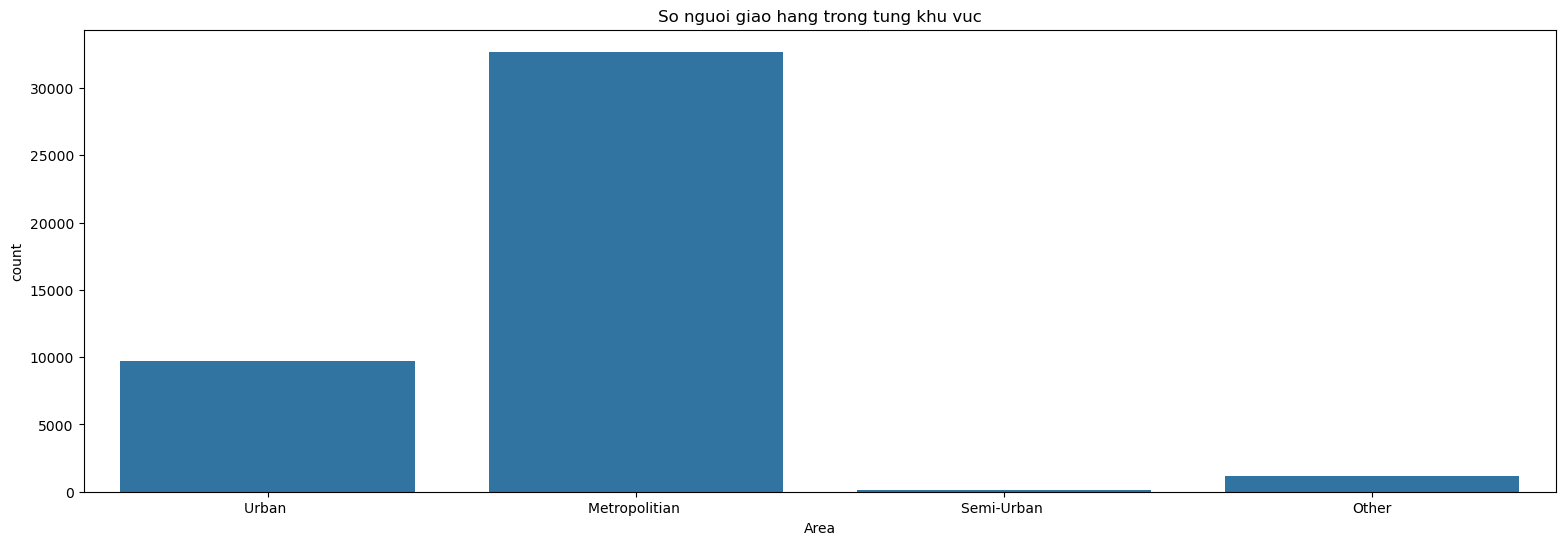

In [93]:
plt.figure(figsize=(19,6))
sns.countplot(x='Area',data=df)
plt.title('So nguoi giao hang trong tung khu vuc')
plt.show()

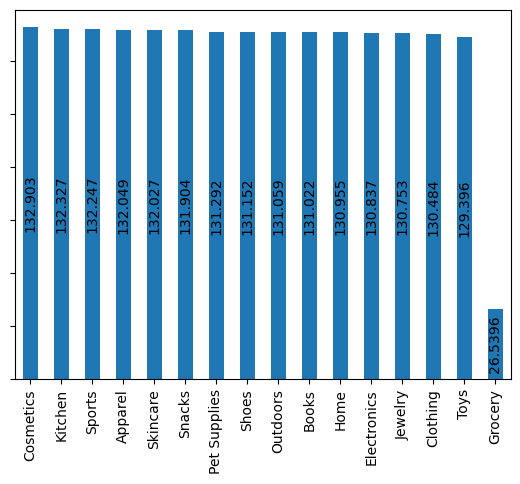

In [95]:
fig, axes = plt.subplots()
grouped = df.groupby("Category")
mean = grouped["Delivery_Time"].mean()
mean = mean.sort_values(ascending=False)
mean.plot(kind="bar", ax=axes)
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
plt.show()

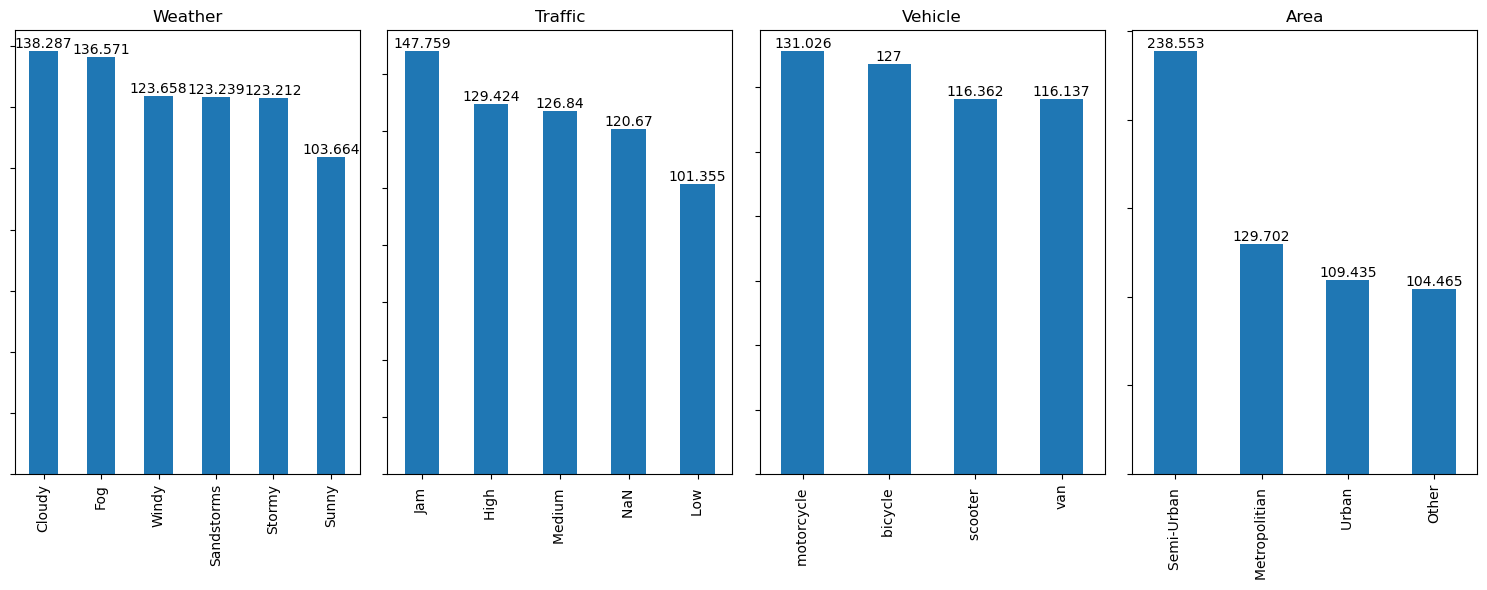

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

for i, j in enumerate(cats[:-1]):
    grouped = df.groupby(j)
    count = grouped["Delivery_Time"].mean()
    count = pd.DataFrame(count).sort_values("Delivery_Time", ascending=False)
    count["Delivery_Time"].plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()


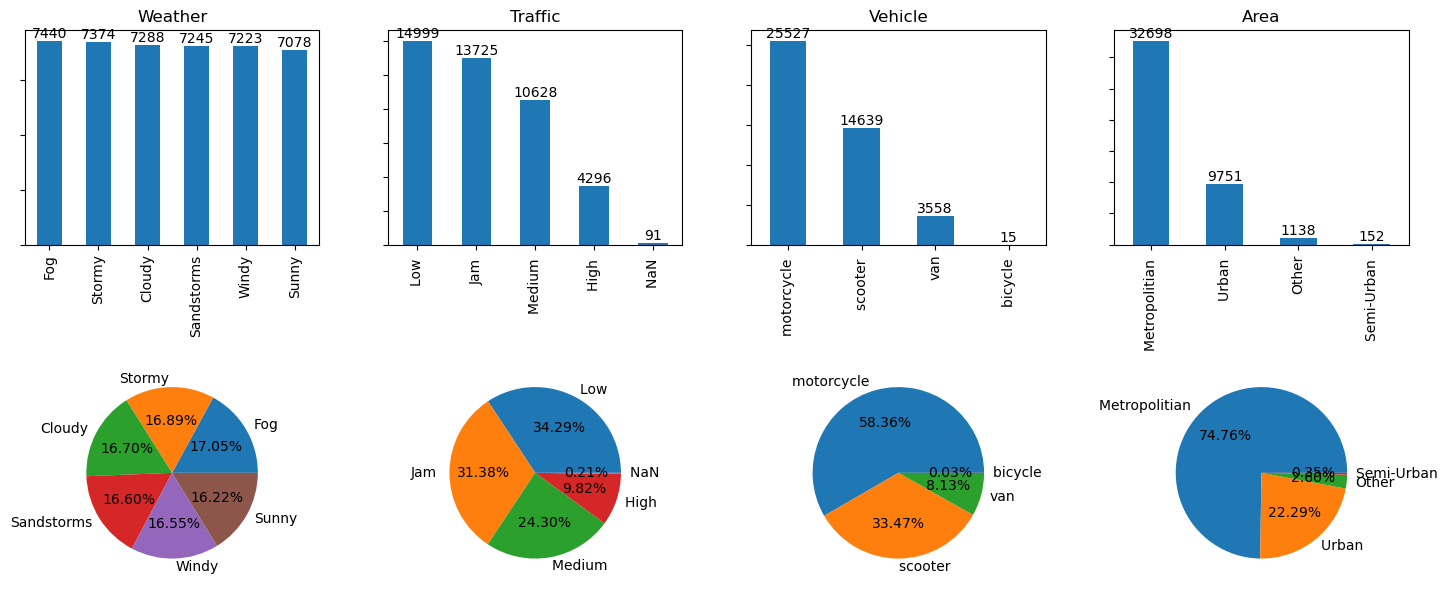

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for i, j in enumerate(cats[:-1]):
    index = 0
    
    count = df[j].value_counts()
    count.plot(kind="bar", ax=axes[index][i])
    for container in axes[index][i].containers:
        axes[index][i].bar_label(container)
    axes[index][i].set_yticklabels(())
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)
    
    index += 1
    
    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
plt.tight_layout()
plt.show()


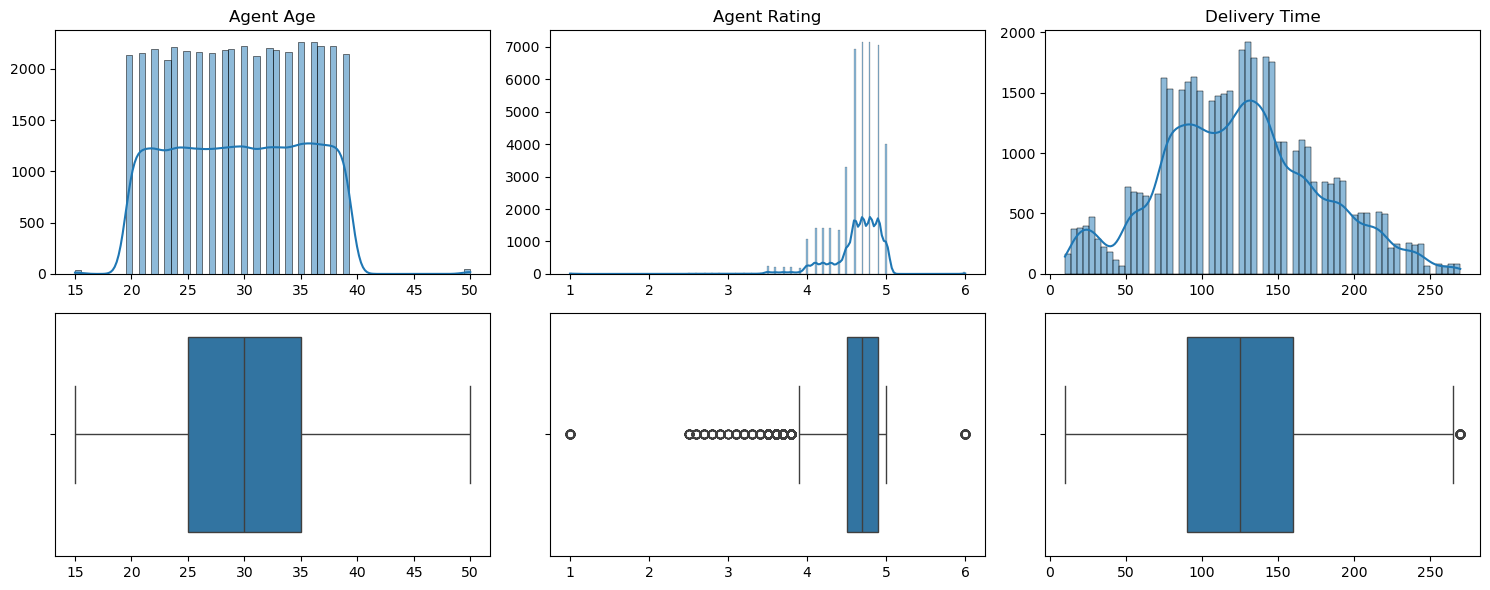

In [101]:
nums = ["Agent_Age", "Agent_Rating", "Delivery_Time"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

for i, j in enumerate(nums):
    index = 0
    
    sns.histplot(df, x=j, kde=True, ax=axes[index][i])
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j.replace('_', ' '))
    
    index += 1
    
    sns.boxplot(df, x=j, ax=axes[index][i])
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
plt.tight_layout()
plt.show()

In [103]:
target = 'Delivery_Time'
features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 
            'Drop_Latitude', 'Drop_Longitude', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

In [105]:
X = df[features]
y = df[target]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
numeric_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']
categorical_features = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

In [111]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [113]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [115]:
# Xây dựng mô hình
input_dim = X_train_preprocessed.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

C:\Users\84388\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
model.fit(X_train_preprocessed, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [119]:
# Hàm dự đoán
def predict_delivery_time(sample):
    sample_preprocessed = preprocessor.transform(sample)
    prediction = model.predict(sample_preprocessed)
    return prediction[0][0]

# Tạo một mẫu mới
new_sample = pd.DataFrame({
    'Agent_Age': [30],
    'Agent_Rating': [4.8],
    'Store_Latitude': [22.745049],
    'Store_Longitude': [75.892471],
    'Drop_Latitude': [22.755049],
    'Drop_Longitude': [75.902471],
    'Weather': ['Sunny'],
    'Traffic': ['Medium'],
    'Vehicle': ['motorcycle'],
    'Area': ['Urban'],
    'Category': ['Electronics']
})

In [121]:
predicted_time = predict_delivery_time(new_sample)

print(f"Predicted delivery time: {predicted_time:.2f} minutes")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted delivery time: 125.20 minutes
